In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score


In [2]:
data = pd.read_csv('/content/creditcard.csv')

In [3]:
print("First 5 rows of the dataset:\n", data.head())
print("\nSummary statistics:\n", data.describe())
print("\nClass distribution:\n", data['Class'].value_counts())

First 5 rows of the dataset:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

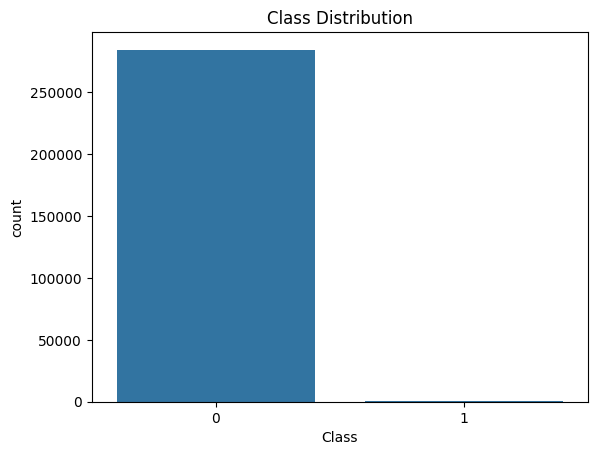

In [4]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

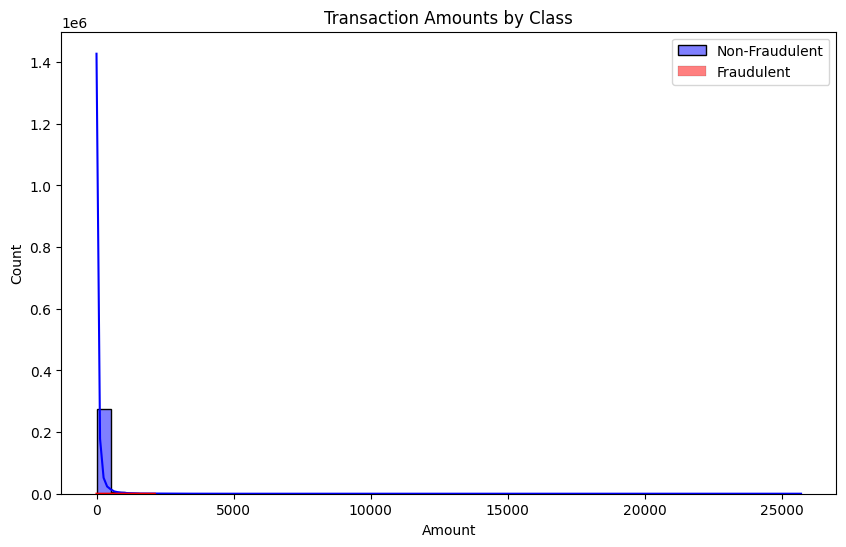

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraudulent', kde=True)
plt.title('Transaction Amounts by Class')
plt.legend()
plt.show()

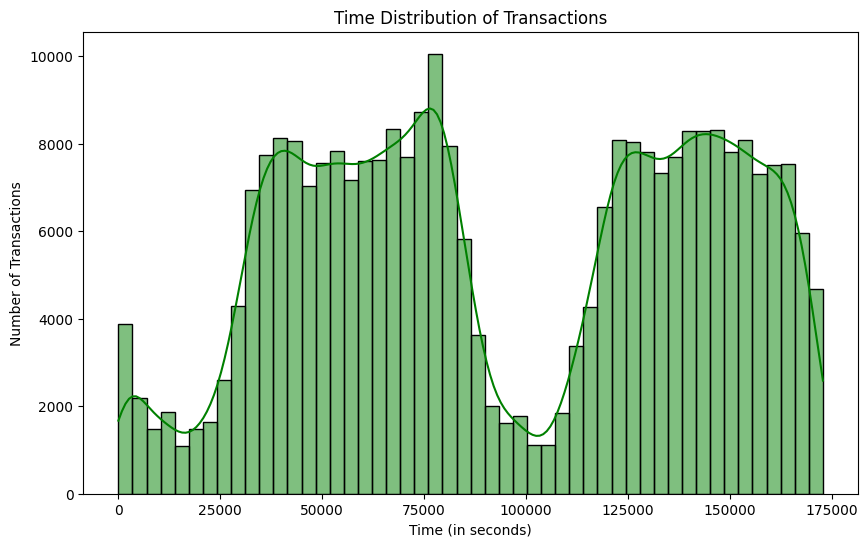

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data['Time'], bins=50, color='green', kde=True)
plt.title('Time Distribution of Transactions')
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of Transactions')
plt.show()

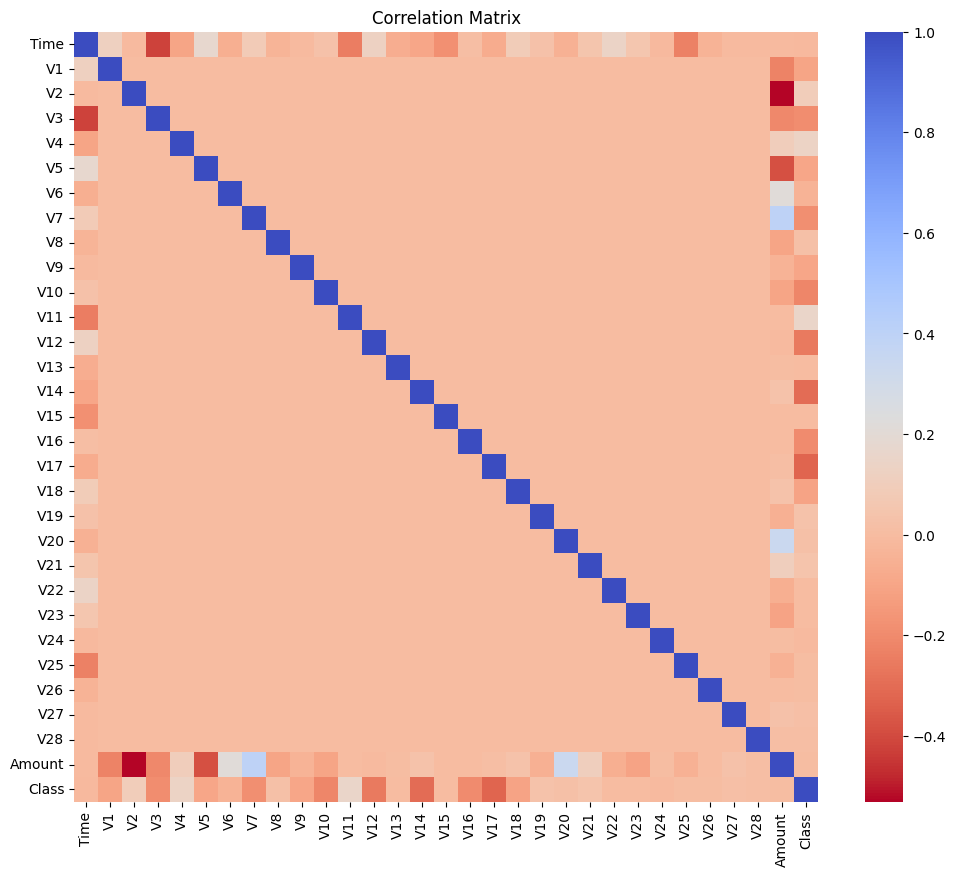

In [7]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

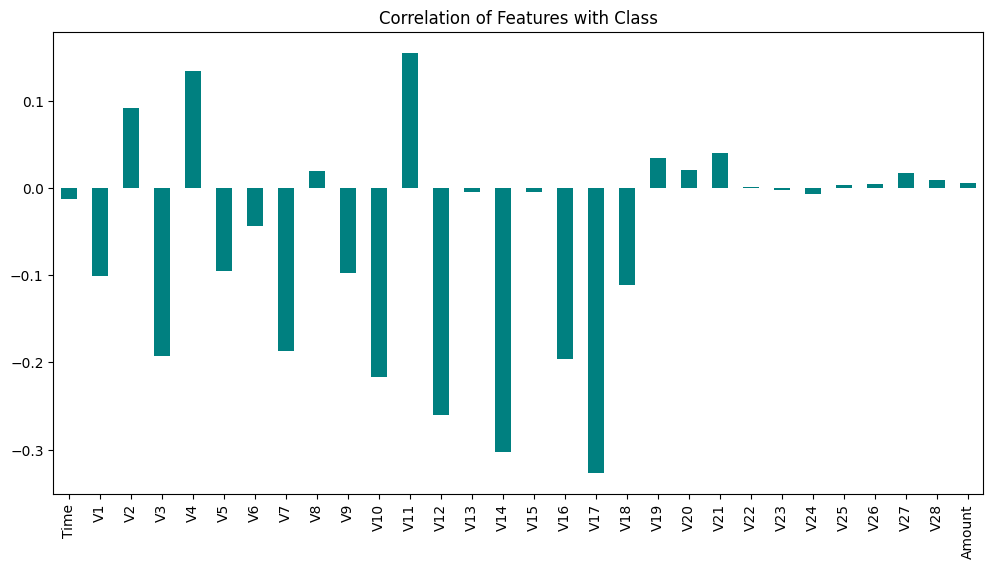

In [8]:
plt.figure(figsize=(12,6))
corr_with_class = data.corr()['Class'][:-1]
corr_with_class.plot(kind='bar', color='teal')
plt.title('Correlation of Features with Class')
plt.show()

In [9]:
print("\nMissing values in the dataset:\n", data.isnull().sum())


Missing values in the dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
log_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

In [14]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_pred_proba = tree_model.predict_proba(X_test)[:, 1]

In [17]:
def evaluate_model(name, y_test, y_pred, y_pred_proba):
    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    return roc_auc

In [18]:
log_roc_auc = evaluate_model("Logistic Regression", y_test, log_pred, log_pred_proba)
tree_roc_auc = evaluate_model("Decision Tree", y_test, tree_pred, tree_pred_proba)


Model: Logistic Regression
Confusion Matrix:
 [[85280    15]
 [   55    93]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9528

Model: Decision Tree
Confusion Matrix:
 [[85264    31]
 [   39   109]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.74      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8681


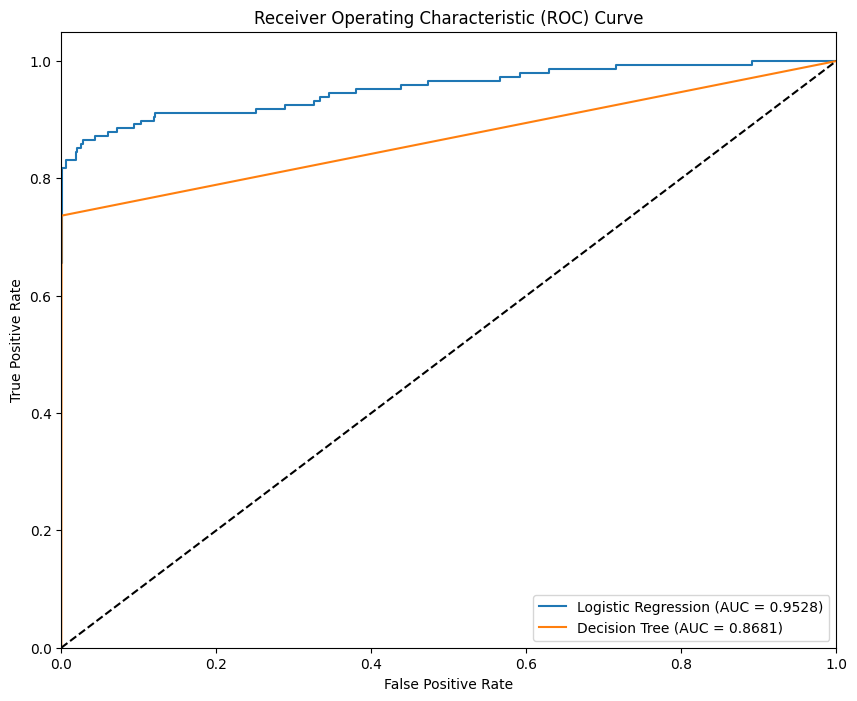

In [19]:
plt.figure(figsize=(10, 8))
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred_proba)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_pred_proba)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_roc_auc:.4f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {tree_roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()